INSTALLING PACKAGES

In [0]:

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
!pip3 install torchtext
!pip3 install torchvision
!pip3 install --no-cache-dir -I pillow


    100% |████████████████████████████████| 2.0MB 53.1MB/s 


DOWNLOAD DATA

In [0]:

import os
import torch
import torchvision
from torchvision.datasets.utils import download_url
import zipfile


train_path = 'train'
dl_file = 'dl2018-image-proj.zip'
dl_url = 'https://users.aalto.fi/mvsjober/misc/'

zip_path = os.path.join(train_path, dl_file)
if not os.path.isfile(zip_path):
    download_url(dl_url + dl_file, root=train_path, filename=dl_file, md5=None)

with zipfile.ZipFile(zip_path) as zip_f:
    zip_f.extractall(train_path)
    
    #os.unlink(zip_path)

In [0]:
import PIL
print(PIL.PILLOW_VERSION)

5.3.0


In [0]:
!ls train/images/im1.jpg

train/images/im1.jpg


In [0]:
PATH = "train/images/"

In [0]:
# workaround 
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

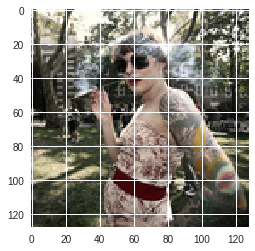

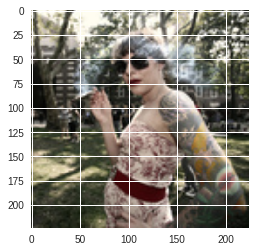

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread(f'{PATH}/im1.jpg')
imgplot = plt.imshow(img)
plt.show()

im = cv2.imread(f'{PATH}/im1.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

Image functions

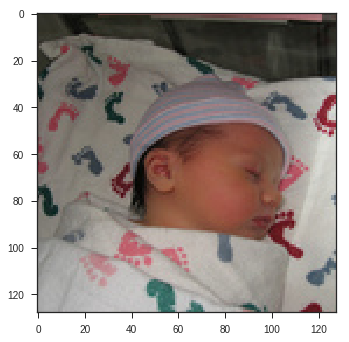

In [0]:
#by path
def plot_imgname(name):
  img=mpimg.imread(f'{PATH}{name}.jpg')
  imgplot = plt.imshow(img)
  plt.show()

plot_imgname('im185')

#check if grayscale
def is_grey_scale(path):
    
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True

def plot_image(tensor):
  if tensor.shape[0] == 3:
    x = tensor.permute(1,2,0).data.numpy()
    plt.imshow(x)
  elif tensor.shape[0] == 1:
    x = tensor.permute(1,2,0).squeeze(2).data.numpy()
    plt.imshow(x, cmap='gray')

In [0]:
#classes

from os import listdir
from os.path import isfile, join
classes = [f[:-4] for f in listdir('train/annotations/') if isfile(join('train/annotations/', f))]

In [0]:
classes

['baby',
 'bird',
 'female',
 'sea',
 'night',
 'portrait',
 'clouds',
 'flower',
 'car',
 'river',
 'people',
 'tree',
 'dog',
 'male']

In [0]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [0]:
#distribution
path='train/annotations/'

dist = dict([(f'{f[:-4]}',file_len(f'{path}{f}')) for f in listdir(path) if isfile(join(path, f))])
            
            

In [0]:
dist

{'baby': 95,
 'bird': 360,
 'car': 319,
 'clouds': 1095,
 'dog': 448,
 'female': 3227,
 'flower': 761,
 'male': 2979,
 'night': 598,
 'people': 6403,
 'portrait': 3121,
 'river': 120,
 'sea': 173,
 'tree': 525}

<Container object of 14 artists>

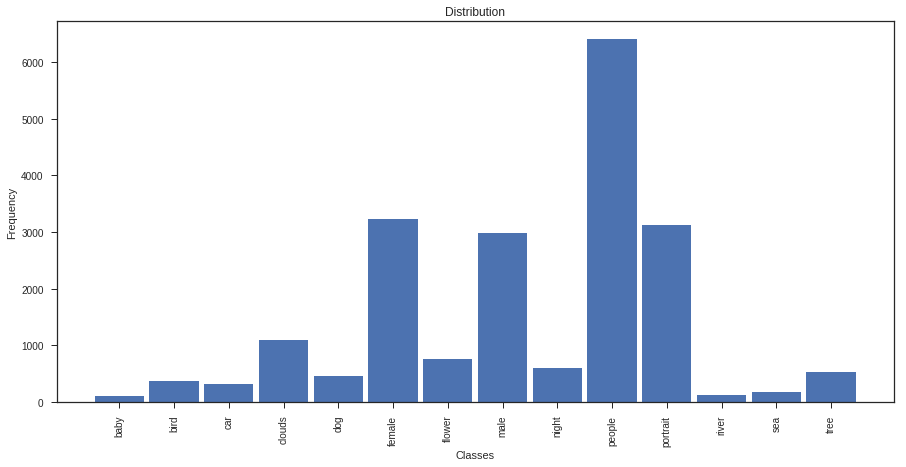

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Classes")
plt.title(f"Distribution")
plt.bar(dist.keys(), dist.values(), width=0.9, color='b')

In [0]:
file_col=listdir("train/images")
list1 = [int(x[2:len(x)-4]) for x in file_col]
list1.sort()
listfin=["train/images/im"+str(num)+".jpg" for num in list1]

file_col=pd.Series(listfin)

df=pd.DataFrame()
df["fileName"]=file_col

path = "train/annotations"

row = 0

file_dic = {}

for label, filename in enumerate(listdir(path)):
  tmp=np.zeros(file_col.shape[0],dtype=int)
  with open(path+"/"+filename, "r") as file:
    file_len = 0
    for line in file:
      line = line.replace("\n", "")
      line = int(line)
      tmp[line-1] = 1
      file_len = file_len + 1
  filename = filename[:-4]
  tmp=pd.Series(tmp)
  df[filename]=tmp
  file_dic[filename] = file_len

print(file_dic)

{'baby': 95, 'bird': 360, 'female': 3227, 'sea': 173, 'night': 598, 'portrait': 3121, 'clouds': 1095, 'flower': 761, 'car': 319, 'river': 120, 'people': 6403, 'tree': 525, 'dog': 448, 'male': 2979}


In [0]:
df.head()


fileName  baby  bird  female  sea  night  portrait  clouds  \
0  train/images/im1.jpg  0     0     1       0    0      1         0        
1  train/images/im2.jpg  0     0     0       0    0      0         0        
2  train/images/im3.jpg  0     0     0       0    0      0         0        
3  train/images/im4.jpg  0     0     0       0    0      0         0        
4  train/images/im5.jpg  0     0     0       0    0      0         0        

   flower  car  river  people  tree  dog  male  
0  0       0    0      1       0     0    0     
1  0       0    0      0       0     0    0     
2  0       0    0      0       0     0    0     
3  0       0    0      1       0     0    1     
4  0       0    0      1       0     0    1

In [0]:
#displaying inline pandas images
import glob
import random
import base64
from io import BytesIO
from IPython.display import HTML

pd.set_option('display.max_colwidth', -1)

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i
  
def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

df['image'] = df.fileName.map(lambda f: get_thumbnail(f))
df.head()

fileName  baby  bird  female  sea  night  portrait  clouds  \
0  train/images/im1.jpg  0     0     1       0    0      1         0        
1  train/images/im2.jpg  0     0     0       0    0      0         0        
2  train/images/im3.jpg  0     0     0       0    0      0         0        
3  train/images/im4.jpg  0     0     0       0    0      0         0        
4  train/images/im5.jpg  0     0     0       0    0      0         0        

   flower  car  river  people  tree  dog  male  \
0  0       0    0      1       0     0    0      
1  0       0    0      0       0     0    0      
2  0       0    0      0       0     0    0      
3  0       0    0      1       0     0    1      
4  0       0    0      1       0     0    1      

                                                                               image  
0  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F3D40F35FD0>  
1  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F3D40EAA160>  
2  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F3D40EAA2B0>  
3  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F3D40EAA5C0>  
4  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F3D40EAA6D8>

In [0]:
df.shape

(20000, 16)

In [0]:
def vec2label (df):
  l = []
  for i in range(df.shape[0]):
    p = []
    for k in df.columns[1:-1]:
      if df.loc[i][f'{k}']:
        p.append(k)
    l.append(p)
  l = pd.Series(l)
  return l

df['classes']= vec2label(df)


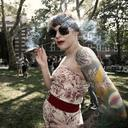
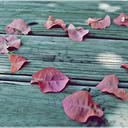
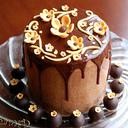
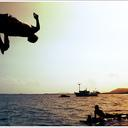
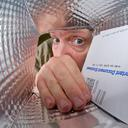
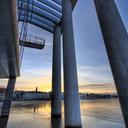
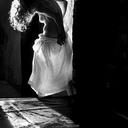
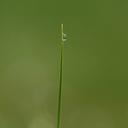
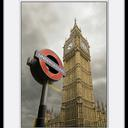
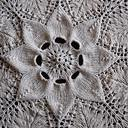
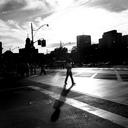
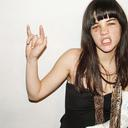
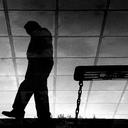
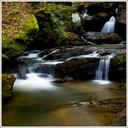
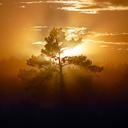
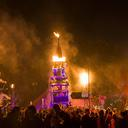
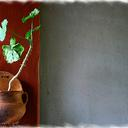
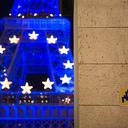
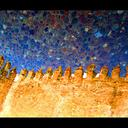
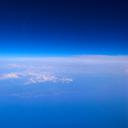

In [0]:
HTML(df[['fileName', 'image','classes']].head(20).to_html(formatters={'image': image_formatter}, escape=False))

In [0]:
df.to_csv("data.csv")

In [0]:
df.head()

fileName  baby  bird  female  sea  night  portrait  clouds  \
0  train/images/im1.jpg  0     0     1       0    0      1         0        
1  train/images/im2.jpg  0     0     0       0    0      0         0        
2  train/images/im3.jpg  0     0     0       0    0      0         0        
3  train/images/im4.jpg  0     0     0       0    0      0         0        
4  train/images/im5.jpg  0     0     0       0    0      0         0        

   flower  car  river  people  tree  dog  male  \
0  0       0    0      1       0     0    0      
1  0       0    0      0       0     0    0      
2  0       0    0      0       0     0    0      
3  0       0    0      1       0     0    1      
4  0       0    0      1       0     0    1      

                                                                               image  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F3D40F35FD0>   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F3D40EAA160>   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F3D40EAA2B0>   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F3D40EAA5C0>   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F3D40EAA6D8>   

                      classes  
0  [female, portrait, people]  
1  []                          
2  []                          
3  [people, male]              
4  [people, male]

In [0]:
print(df.iloc[0,0])

train/images/im1.jpg


In [0]:
#PREPARING THE DATALOADER
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
import operator

class ImageDataset:
  def __init__ (self, csv_file, transform=None):
    self.data_frame = pd.read_csv(csv_file)
    self.data_frame=self.data_frame.drop(['Unnamed: 0'], axis=1)
    self.to_tensor = transforms.ToTensor()
    self.to_grayscale = transforms.Grayscale()
    self.transform = transform
    
  
  def __len__(self):
        return len(self.data_frame)
   
  def __getitem__(self, idx):
    img=Image.open(f'{self.data_frame.iloc[idx,0]}').convert("RGB")
    img = self.to_tensor(img)
    labels = np.asarray(self.data_frame.iloc[idx,1:-2],dtype=np.int16)
    labels_classes = self.data_frame.iloc[idx,16]
    sample = dict({'image': img, 'labels': labels, 'classes':labels_classes})
    if self.transform:
      sample = self.transform(sample)
    return (sample)
  
  
        
    


In [142]:
image_dataset = ImageDataset("data.csv")
image_dataset.__getitem__(0)


{'classes': "['female', 'portrait', 'people']",
 'image': tensor([[[0.7882, 0.3059, 0.4118,  ..., 0.1725, 0.1176, 0.1373],
          [0.9137, 0.4431, 0.3412,  ..., 0.3294, 0.3176, 0.4275],
          [0.9608, 0.5529, 0.3020,  ..., 0.4745, 0.5059, 0.4039],
          ...,
          [0.1333, 0.1529, 0.1804,  ..., 0.0824, 0.0627, 0.0471],
          [0.1765, 0.1451, 0.2118,  ..., 0.0549, 0.0314, 0.0275],
          [0.1922, 0.2706, 0.2784,  ..., 0.0196, 0.0275, 0.0314]],
 
         [[0.7686, 0.3098, 0.4118,  ..., 0.1725, 0.1294, 0.1529],
          [0.8980, 0.4431, 0.3412,  ..., 0.3294, 0.3255, 0.4392],
          [0.9490, 0.5569, 0.3020,  ..., 0.4784, 0.5059, 0.4118],
          ...,
          [0.1373, 0.1569, 0.1765,  ..., 0.0902, 0.0745, 0.0667],
          [0.1725, 0.1412, 0.2118,  ..., 0.0627, 0.0431, 0.0471],
          [0.1882, 0.2706, 0.2784,  ..., 0.0275, 0.0353, 0.0510]],
 
         [[0.6941, 0.2549, 0.3725,  ..., 0.1647, 0.1020, 0.0980],
          [0.8549, 0.3961, 0.2941,  ..., 0.3294, 

0 torch.Size([3, 128, 128]) ['female', 'portrait', 'people']
1 torch.Size([3, 128, 128]) []
2 torch.Size([3, 128, 128]) []
3 torch.Size([3, 128, 128]) ['people', 'male']


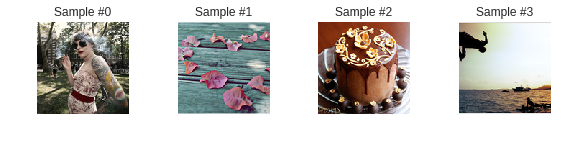

In [143]:
image_dataset = ImageDataset("data.csv")

fig = plt.figure()

for i in range(len(image_dataset)):
    sample = image_dataset[i]
    print(i, sample['image'].shape, sample['classes'])
    
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plot_image(sample['image'])
   
    if i == 3:
        plt.show()
        break

In [144]:

dataloader = DataLoader(image_dataset, batch_size=32, shuffle=True, num_workers=4)

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['classes'])

    # observe 4th batch and stop.
    if i_batch == 3:
        break

0 torch.Size([32, 3, 128, 128]) ["['portrait', 'people', 'male']", "['dog']", "['clouds']", '[]', "['portrait', 'people', 'male']", '[]', "['female', 'people']", "['people', 'male']", "['female', 'people']", '[]', "['female', 'people']", '[]', "['people', 'male']", '[]', '[]', '[]', '[]', "['female', 'people', 'male']", "['people', 'male']", "['tree']", '[]', "['female', 'portrait', 'people']", "['night']", "['female', 'portrait', 'people']", '[]', "['portrait', 'people', 'male']", "['female', 'car', 'people']", "['clouds']", "['flower']", '[]', "['portrait', 'people', 'male']", '[]']
1 torch.Size([32, 3, 128, 128]) ["['people']", '[]', '[]', "['female', 'portrait', 'people']", "['female', 'portrait', 'people']", "['night']", "['portrait', 'people', 'male']", '[]', '[]', "['dog']", "['people', 'male']", '[]', '[]', "['portrait', 'people', 'male']", '[]', '[]', "['portrait', 'people', 'male']", "['people']", "['female', 'people', 'male']", "['night']", '[]', '[]', "['clouds', 'people']"

In [0]:
#CUSTOM CNN MODEL

